In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt

# Real data
## Run optical gating

In [3]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

og = BOG()
og.logger.set_quiet()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run(bias_correct=False)

og_bc = BOG()
og_bc.logger.set_quiet()
og_bc.set_sequence(sequence)
og_bc.set_reference_sequence(reference_sequence)
og_bc.set_reference_period(reference_sequence_period)
og_bc.run(bias_correct=True)

"""v = Drawer(30, 39.1, (256, 256))
v.generate_reference_sequence()
v.generate_sequence()
og = BOG()
og.logger.set_quiet()
og.set_sequence(v.sequence)
og.set_reference_sequence(v.reference_sequence)
og.set_reference_period(v.reference_period)
og.run(bias_correct = False)

og_bc = BOG()
og_bc.logger.set_quiet()
og_bc.set_sequence(v.sequence)
og_bc.set_reference_sequence(v.reference_sequence)
og_bc.set_reference_period(v.reference_period)
og_bc.run(bias_correct = True)"""


'v = Drawer(30, 39.1, (256, 256))\nv.generate_reference_sequence()\nv.generate_sequence()\nog = BOG()\nog.logger.set_quiet()\nog.set_sequence(v.sequence)\nog.set_reference_sequence(v.reference_sequence)\nog.set_reference_period(v.reference_period)\nog.run(bias_correct = False)\n\nog_bc = BOG()\nog_bc.logger.set_quiet()\nog_bc.set_sequence(v.sequence)\nog_bc.set_reference_sequence(v.reference_sequence)\nog_bc.set_reference_period(v.reference_period)\nog_bc.run(bias_correct = True)'

25.041304130413042


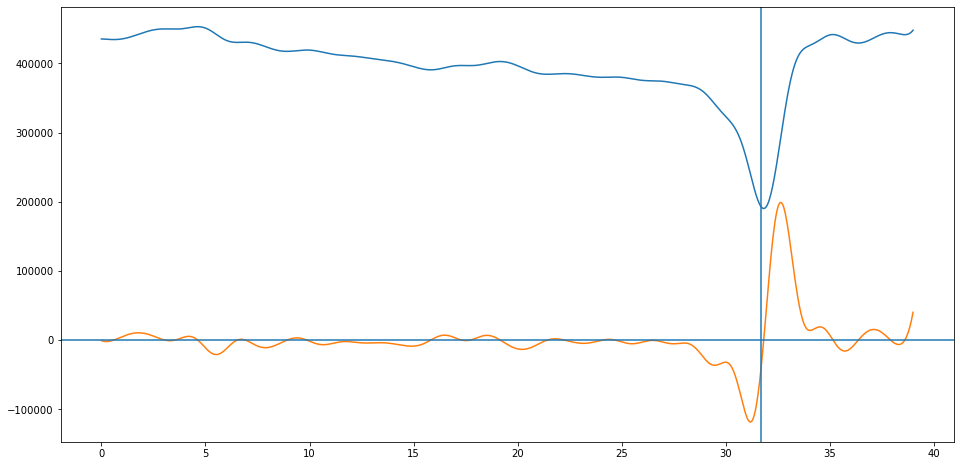

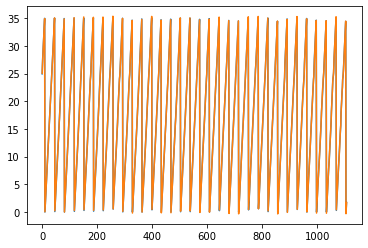

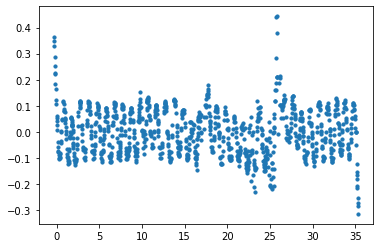

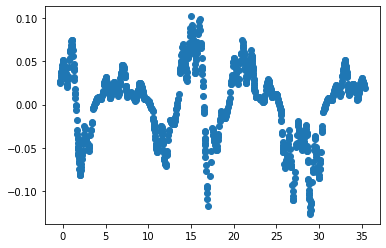

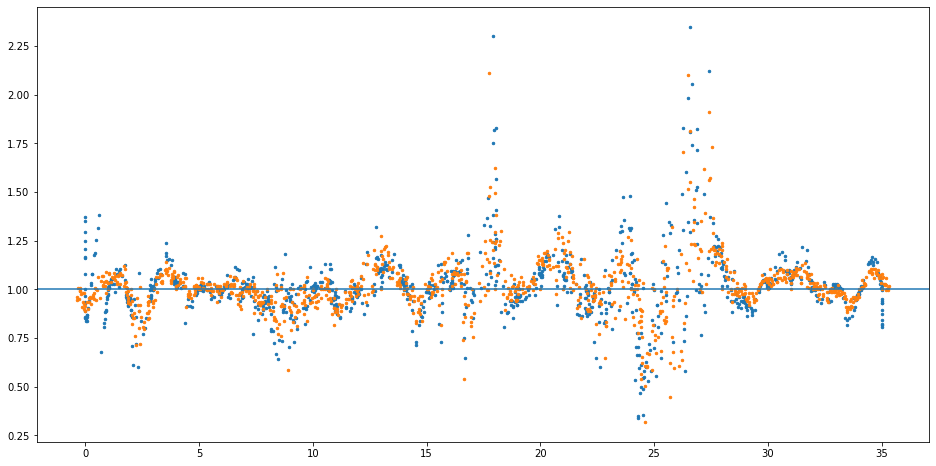

In [6]:
print(og.phases[0])
frame = 4
plt.figure(figsize = (16,8))
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
xs = range(og.sads[frame].shape[0])
cs = CubicSpline(xs, og.sads[frame])
cs = UnivariateSpline(xs, og.sads[frame], k = 5)
xs = np.linspace(0, xs[-1], 1000)
plt.plot(xs, cs(xs, 0))
plt.plot(xs, cs(xs, 1))
plt.axvline(og.phases[frame] + 2)
plt.axhline(0)
plt.show()

phases = []
for sad in og.sads:
    xs = range(sad.shape[0])
    cs = CubicSpline(xs, sad, bc_type = "natural")
    xs = np.linspace(2, xs[-1] - 1, 10000)
    xs = np.linspace(2, xs[-1] - 1, 10000)
    phase = xs[np.argmin(cs(xs))] - 2
    phases.append(phase)

delta_phases = []
for i in range(1, len(phases)):
    delta_phase = phases[i] - phases[i - 1]
    while delta_phase < -og.reference_period / 2:
        delta_phase += og.reference_period
    delta_phases.append(delta_phase)

plt.plot(phases)
plt.plot(og.phases)
plt.show()

phases = np.array(phases)

plt.scatter(og.phases, phases - og_bc.phases, s = 10)
plt.show()
plt.scatter(og.phases, og.phases - og_bc.phases)

plt.figure(figsize = (16,8))
plt.axhline(1)
plt.scatter(phases[1::], delta_phases, s = 6)
plt.scatter(og_bc.phases[1::], og_bc.delta_phases, s = 6)
#plt.scatter(og.phases[1::], og.delta_phases, s = 6)
plt.show()

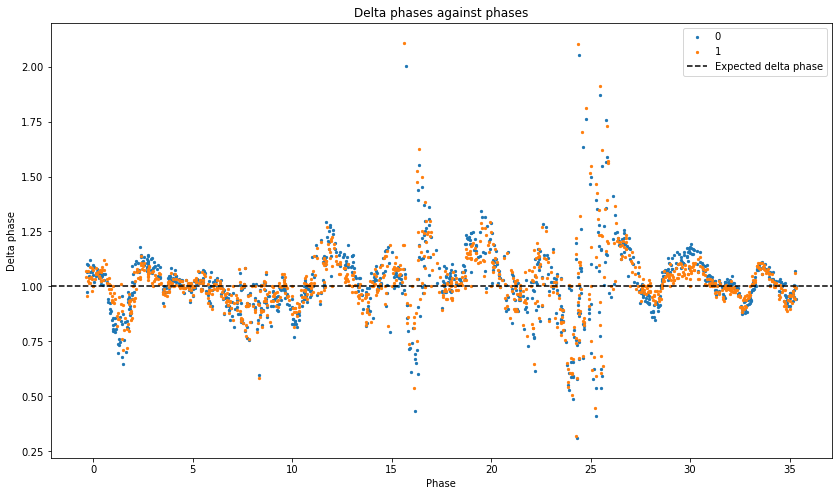

In [5]:
bogp = BOGP([og, og_bc])
bogp.plot_delta_phases_phases()

## Plot

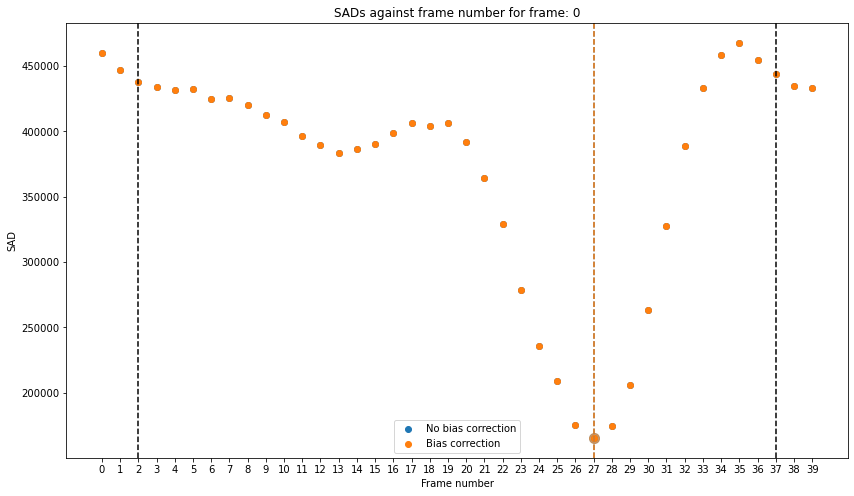

In [6]:
bog = BOGP([og, og_bc], ["No bias correction", "Bias correction"])
bog.plot_sads(0)

# Synthetic data
# Generate

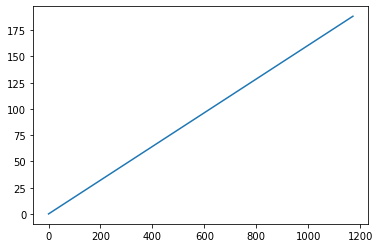

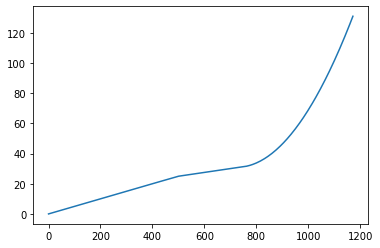

In [7]:
v = Drawer(30, 39.1, (256, 256))
v.generate_reference_sequence()
v.generate_sequence()

In [8]:
sog = BOG()
sog.logger.set_quiet()
sog.set_reference_period(v.reference_period)
sog.set_reference_sequence(v.reference_sequence)
sog.set_sequence(v.sequence)
sog.set_reference_framerates(v.reference_phases)
sog.run(bias_correct = False)

sog_bc = BOG()
sog_bc.logger.set_quiet()
sog_bc.set_reference_period(v.reference_period)
sog_bc.set_reference_sequence(v.reference_sequence)
sog_bc.set_sequence(v.sequence)
sog_bc.set_reference_framerates(v.reference_phases)
sog_bc.run(bias_correct = True)

KeyboardInterrupt: 

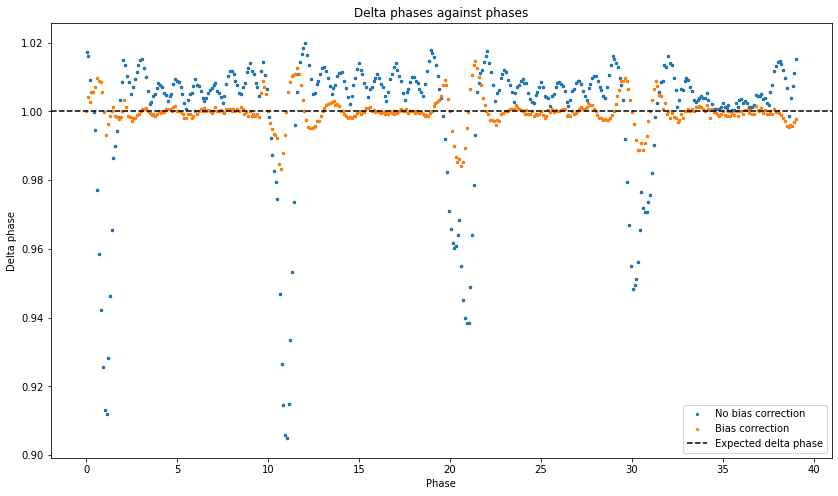

In [ ]:
sogp = BOGP([sog, sog_bc], ["No bias correction", "Bias correction"])
sogp.plot_delta_phases_phases()